## Artificial Neural Network:

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
import warnings
warnings.filterwarnings('ignore')

In [3]:
# reading the dataset
df = pd.read_csv("/content/drive/MyDrive/Deep Learning/Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# check if there is any null value
df.isnull().sum().sum()

0

### Data preprocessing:

In [5]:
# checking how many unique value in that columnn for replacing
df.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [6]:
# replacing categorical value with numerical values
df['Geography'] = df['Geography'].replace(['France', 'Spain', 'Germany'], [0,1,2])
df['Gender'] = df['Gender'].replace(['Male', 'Female'], [0, 1])

In [7]:
# drop unwanted columns
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [8]:
df.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [9]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,1,42,2,0.00,1,1,1,101348.88,1
1,608,1,1,41,1,83807.86,1,0,1,112542.58,0
2,502,0,1,42,8,159660.80,3,1,0,113931.57,1
3,699,0,1,39,1,0.00,2,0,0,93826.63,0
4,850,1,1,43,2,125510.82,1,1,1,79084.10,0


In [10]:
X = df.drop(columns='Exited')
y = df['Exited']

In [11]:
# split dataset into train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Feature scaling:

In [12]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

### Initialising the ANN:

In [13]:
# initialising the model
model = Sequential()

In [14]:
# Adding the input layer (first hidden layer)
model.add(Dense(units=10, kernel_initializer='he_uniform', activation='relu', input_dim = 10))

In [15]:
# Adding the another input layer (second hidden layer)
model.add(Dense(units=20, kernel_initializer='he_uniform', activation='relu')) # for 2nd hidden layer dont use input_dim

In [16]:
# Adding the another input layer (third hidden layer)
model.add(Dense(units=10, kernel_initializer='he_uniform', activation='relu')) # for 3rd hidden layer dont use input_dim

In [17]:
# Adding the output layer
model.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

In [18]:
# compile the ANN 
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [19]:
# Fitting the ANN to the Training set
Model = model.fit(X_train, y_train, validation_split=0.1, epochs=10, batch_size=100, )

Epoch 1/10
72/72 [==============================] - 1s 6ms/step - loss: 0.5586 - accuracy: 0.7774 - val_loss: 0.5255 - val_accuracy: 0.7950
Epoch 2/10
72/72 [==============================] - 0s 3ms/step - loss: 0.5099 - accuracy: 0.7961 - val_loss: 0.5110 - val_accuracy: 0.7950
Epoch 3/10
72/72 [==============================] - 0s 2ms/step - loss: 0.5010 - accuracy: 0.7961 - val_loss: 0.5005 - val_accuracy: 0.7950
Epoch 4/10
72/72 [==============================] - 0s 2ms/step - loss: 0.4917 - accuracy: 0.7961 - val_loss: 0.4862 - val_accuracy: 0.7950
Epoch 5/10
72/72 [==============================] - 0s 2ms/step - loss: 0.4815 - accuracy: 0.7960 - val_loss: 0.4722 - val_accuracy: 0.8000
Epoch 6/10
72/72 [==============================] - 0s 3ms/step - loss: 0.4735 - accuracy: 0.7979 - val_loss: 0.4644 - val_accuracy: 0.8087
Epoch 7/10
72/72 [==============================] - 0s 2ms/step - loss: 0.4670 - accuracy: 0.8028 - val_loss: 0.4551 - val_accuracy: 0.8112
Epoch 8/10
72/72 [==

In [20]:
# list all data in history
print(Model.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


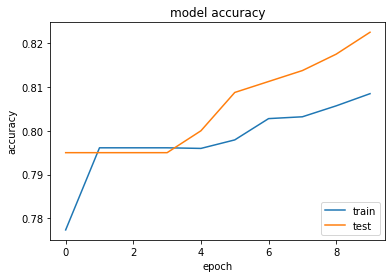

In [21]:
# summarize history for accuracy
plt.plot(Model.history['accuracy'])
plt.plot(Model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

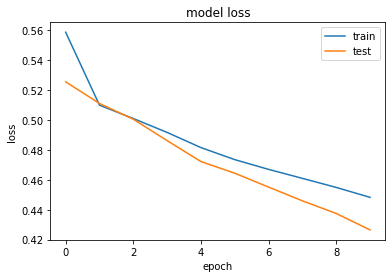

In [22]:
# summarize history for loss
plt.plot(Model.history['loss'])
plt.plot(Model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [23]:
# fitting the test dataset
y_pred = model.predict(X_test)
y_pred = y_pred > 0.5

In [24]:
# confusion matrix
print(f"Confusion matrix:\n {confusion_matrix(y_pred, y_test)}")

# classification report
print(f"Classification report:\n {classification_report(y_pred, y_test)}")

Confusion matrix:
 [[1563  320]
 [  32   85]]
Classification report:
               precision    recall  f1-score   support

       False       0.98      0.83      0.90      1883
        True       0.21      0.73      0.33       117

    accuracy                           0.82      2000
   macro avg       0.59      0.78      0.61      2000
weighted avg       0.93      0.82      0.87      2000



### HyperParameter tunning:

In [25]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding, Flatten, LeakyReLU, BatchNormalization, Dropout
from keras.activations import relu, sigmoid

In [26]:
def create_model(layer, activation, kernel):
    model = Sequential()
    for i, nodes in enumerate(layer):
        if i == 0:
            model.add(Dense(nodes, input_dim=X_train.shape[1]))
            model.add(Activation(activation))
        else:
            model.add(Dense(nodes), kernel_initializer=kernel)
            model.add(Activation(activation))
            
    model.add(Dense(units=1, activation='sigmoid', kernel_initializer="glorot_uniform"))   # this one is output layer so we use sigmoid af
    model.compile(optimizer='adam', loss="binary_crossentropy", metrics=['accuracy'])
    return model

In [27]:
# creating an object for previous function
model = KerasClassifier(build_fn=create_model)

In [28]:
layers = [[20], [40, 20], [40, 20, 10]]
activations = ['relu', 'sigmoid']
kernel = [['he_uniform', 'he_normal'], ['glorot_uniform', 'glorot_normal']]
para_grid = dict(layer=layers, activation=activations, kernel=kernel)
grid = GridSearchCV(model, para_grid, cv=5)

In [29]:
# fitting dataset with created model 
grid.fit(X_train, y_train, validation_split=0.3, validation_data=(X_test, y_test), epochs=10)

Epoch 1/10
140/140 [==============================] - 1s 3ms/step - loss: 0.5431 - accuracy: 0.7917 - val_loss: 0.5025 - val_accuracy: 0.7995
Epoch 2/10
140/140 [==============================] - 0s 2ms/step - loss: 0.4957 - accuracy: 0.7973 - val_loss: 0.4832 - val_accuracy: 0.7995
Epoch 3/10
140/140 [==============================] - 0s 2ms/step - loss: 0.4776 - accuracy: 0.7973 - val_loss: 0.4729 - val_accuracy: 0.7995
Epoch 4/10
140/140 [==============================] - 0s 2ms/step - loss: 0.4671 - accuracy: 0.7973 - val_loss: 0.4663 - val_accuracy: 0.7995
Epoch 5/10
140/140 [==============================] - 0s 2ms/step - loss: 0.4599 - accuracy: 0.7973 - val_loss: 0.4617 - val_accuracy: 0.7995
Epoch 6/10
140/140 [==============================] - 0s 2ms/step - loss: 0.4536 - accuracy: 0.7973 - val_loss: 0.4553 - val_accuracy: 0.8005
Epoch 7/10
140/140 [==============================] - 0s 2ms/step - loss: 0.4480 - accuracy: 0.8000 - val_loss: 0.4506 - val_accuracy: 0.8016
Epoch 

GridSearchCV(cv=5, error_score=nan,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7f14b96a9810>,
             iid='deprecated', n_jobs=None,
             param_grid={'activation': ['relu', 'sigmoid'],
                         'kernel': [['he_uniform', 'he_normal'],
                                    ['glorot_uniform', 'glorot_normal']],
                         'layer': [[20], [40, 20], [40, 20, 10]]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [30]:
print(grid.best_params_, grid.best_score_)

{'activation': 'relu', 'kernel': ['he_uniform', 'he_normal'], 'layer': [20]} 0.8108749985694885


### HyperParameter Tunnig using KerasTunner:

In [31]:
# !pip install keras_tuner
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Activation
from keras_tuner import RandomSearch

In [32]:
def create_model(hp):
    model = Sequential()
    for i in range(hp.Int("num_layer", 2, 20)):
        model.add(Dense(units= hp.Int("units_" + str(i), min_value=32, max_value=512, step=32),
                        activation='ELU', kernel_initializer='he_uniform', 
                        input_dim=X_train.shape[1]))
    model.add(Dense(units=1, activation="sigmoid"))
    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
                  loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [33]:
tuner = RandomSearch(hypermodel=create_model,
                      objective="val_accuracy",
                      max_trials=5,
                      executions_per_trial=3,
                      directory='Log',
                      project_name='HyperTuning')

INFO:tensorflow:Reloading Oracle from existing project Log/HyperTuning/oracle.json
INFO:tensorflow:Reloading Tuner from Log/HyperTuning/tuner0.json


In [34]:
tuner.search(X_train, y_train, epochs=10, validation_split=0.3)

INFO:tensorflow:Oracle triggered exit


In [35]:
model = tuner.get_best_models(num_models=1)[0]

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 288)               3168      
_________________________________________________________________
dense_1 (Dense)              (None, 352)               101728    
_________________________________________________________________
dense_2 (Dense)              (None, 32)                11296     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               8448      
_________________________________________________________________
dense_4 (Dense)              (None, 96)                24672     
_________________________________________________________________
dense_5 (Dense)              (None, 320)               31040     
_________________________________________________________________
dense_6 (Dense)              (None, 256)               8

In [37]:
Model = model.fit(X_train, y_train, epochs=10, validation_split=0.3, validation_data=(X_test, y_test))

Epoch 1/10
175/175 [==============================] - 2s 9ms/step - loss: 0.3296 - accuracy: 0.8596 - val_loss: 0.3787 - val_accuracy: 0.8388
Epoch 2/10
175/175 [==============================] - 1s 8ms/step - loss: 0.3308 - accuracy: 0.8605 - val_loss: 0.3702 - val_accuracy: 0.8454
Epoch 3/10
175/175 [==============================] - 1s 7ms/step - loss: 0.3233 - accuracy: 0.8652 - val_loss: 0.3821 - val_accuracy: 0.8404
Epoch 4/10
175/175 [==============================] - 1s 8ms/step - loss: 0.3253 - accuracy: 0.8646 - val_loss: 0.3813 - val_accuracy: 0.8487
Epoch 5/10
175/175 [==============================] - 1s 8ms/step - loss: 0.3225 - accuracy: 0.8614 - val_loss: 0.3835 - val_accuracy: 0.8388
Epoch 6/10
175/175 [==============================] - 1s 7ms/step - loss: 0.3162 - accuracy: 0.8666 - val_loss: 0.3846 - val_accuracy: 0.8438
Epoch 7/10
175/175 [==============================] - 1s 8ms/step - loss: 0.3184 - accuracy: 0.8679 - val_loss: 0.3783 - val_accuracy: 0.8567
Epoch 

In [38]:
print(Model.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


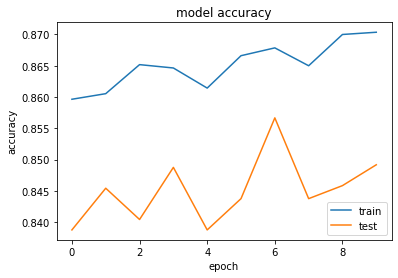

In [39]:
# summarize history for accuracy
plt.plot(Model.history['accuracy'])
plt.plot(Model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

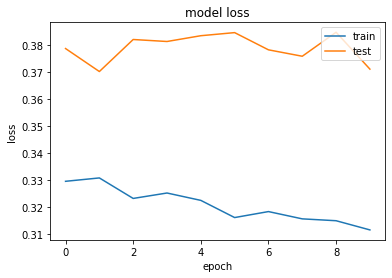

In [40]:
# summarize history for loss
plt.plot(Model.history['loss'])
plt.plot(Model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [41]:
# fitting the test dataset
y_pred = model.predict(X_test)
y_pred = y_pred > 0.5

In [42]:
# confusion matrix
print(f"Confusion matrix:\n {confusion_matrix(y_pred, y_test)}")

# classification report
print(f"Classification report:\n {classification_report(y_pred, y_test)}")

Confusion matrix:
 [[1533  224]
 [  62  181]]
Classification report:
               precision    recall  f1-score   support

       False       0.96      0.87      0.91      1757
        True       0.45      0.74      0.56       243

    accuracy                           0.86      2000
   macro avg       0.70      0.81      0.74      2000
weighted avg       0.90      0.86      0.87      2000



### Sample Code from the documentation

In [43]:
from tensorflow import keras
import numpy as np

(x, y), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x[:-10000]
x_val = x[-10000:]
y_train = y[:-10000]
y_val = y[-10000:]

x_train = np.expand_dims(x_train, -1).astype("float32") / 255.0
x_val = np.expand_dims(x_val, -1).astype("float32") / 255.0
x_test = np.expand_dims(x_test, -1).astype("float32") / 255.0

num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [44]:
from tensorflow.keras import layers
from keras_tuner import RandomSearch


def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Flatten())
    model.add(
        layers.Dense(
            units=hp.Int("units", min_value=32, max_value=512, step=32),
            activation="relu",
        )
    )
    model.add(layers.Dense(10, activation="softmax"))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice("learning_rate", values=[1e-2, 1e-3, 1e-4])
        ),
        loss="categorical_crossentropy",
        metrics=["accuracy"],
    )
    return model

In [45]:
tuner = RandomSearch(
    build_model,
    objective="val_accuracy",
    max_trials=3,
    executions_per_trial=2,
    overwrite=True,
    directory="my_dir",
    project_name="helloworld",
)

In [46]:
tuner.search_space_summary()

Search space summary
Default search space size: 2
units (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [47]:
tuner.search(x_train, y_train, epochs=2, validation_data=(x_val, y_val))

Trial 3 Complete [00h 00m 20s]
val_accuracy: 0.9303500056266785

Best val_accuracy So Far: 0.9659500122070312
Total elapsed time: 00h 01m 01s
INFO:tensorflow:Oracle triggered exit


In [48]:
model = tuner.get_best_models(num_models=1)[0]

In [49]:
Model = model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))

Epoch 1/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0960 - accuracy: 0.9711 - val_loss: 0.1074 - val_accuracy: 0.9681
Epoch 2/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.0736 - accuracy: 0.9781 - val_loss: 0.0912 - val_accuracy: 0.9720
Epoch 3/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.0572 - accuracy: 0.9827 - val_loss: 0.0861 - val_accuracy: 0.9747
Epoch 4/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.0458 - accuracy: 0.9864 - val_loss: 0.0873 - val_accuracy: 0.9734
Epoch 5/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.0371 - accuracy: 0.9887 - val_loss: 0.0982 - val_accuracy: 0.9711
Epoch 6/10
1563/1563 [==============================] - 4s 2ms/step - loss: 0.0305 - accuracy: 0.9907 - val_loss: 0.0887 - val_accuracy: 0.9744
Epoch 7/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.0261 - accuracy: 0.9920 - val_loss: 0.0817 - val_accuracy:

In [50]:
Model.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

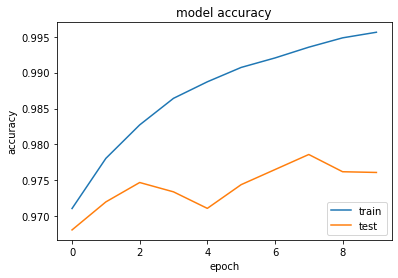

In [51]:
# summarize history for accuracy
plt.plot(Model.history['accuracy'])
plt.plot(Model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

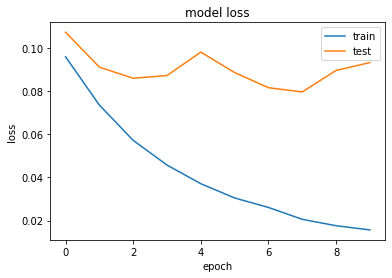

In [52]:
# summarize history for loss
plt.plot(Model.history['loss'])
plt.plot(Model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()